---
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Investigación Operativa I4051__\
__Autor: Rodrigo Maranzana__, Rmaranzana@frba.utn.edu.ar

---

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ejemplo de histograma

In [123]:
datos = 100000

# Generamos N números aleatorios normales.
norm = np.random.normal(5, 1, datos)

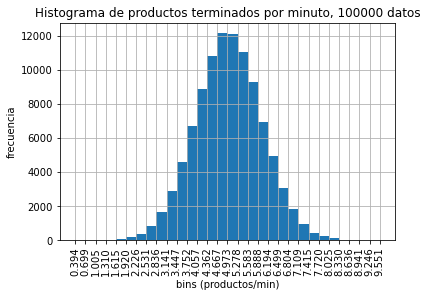

In [124]:
# Graficamos el histograma
_, bins, _ = plt.hist(norm, bins=30)
plt.xlabel('bins (productos/min)')
plt.ylabel('frecuencia')
plt.title(f'Histograma de productos terminados por minuto, {datos} datos')
plt.xticks(bins)
plt.xticks(rotation=90)
plt.grid()

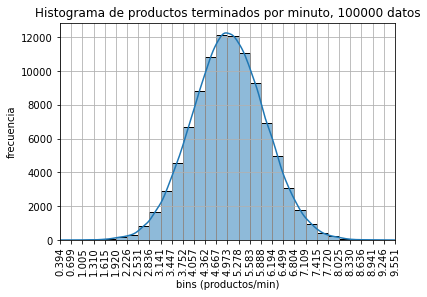

In [125]:
# Graficamos el histograma
sns.histplot(norm, bins=30, kde=True)
plt.xlabel('bins (productos/min)')
plt.ylabel('frecuencia')
plt.title(f'Histograma de productos terminados por minuto, {datos} datos')
plt.xticks(bins)
plt.xticks(rotation=90)
plt.xlim([min(bins), max(bins)])
plt.grid()

# Ejemplo de juego de rol con dados

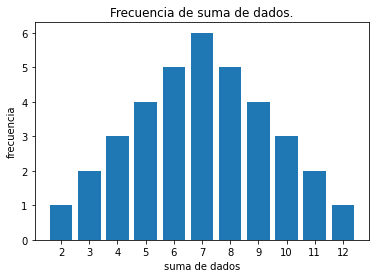

In [206]:
#Resolución analítica.
frecuencias = {
    2: 1,
    3: 2,
    4: 3,
    5: 4,
    6: 5,
    7: 6,
    8: 5,
    9: 4,
    10: 3,
    11: 2,
    12: 1
}

# Plot.
plt.bar(frecuencias.keys(), frecuencias.values())
plt.xlabel('suma de dados')
plt.ylabel('frecuencia')
plt.title(f'Frecuencia de suma de dados.')
plt.xticks(range(2, 13))
plt.show()

In [183]:
#Resolución mediante simulación de cada dado por separado.
def tirar_dados(n_tiradas):
    dado1 = np.random.randint(1, 7, n_tiradas)
    dado2 = np.random.randint(1, 7, n_tiradas)
    suma = []

    for i in range(0, n_tiradas):
        suma_i = dado1[i] + dado2[i]
        suma.append(suma_i)
    
    return dado1, dado2, suma

In [184]:
dado1, dado2, suma = tirar_dados(23)
df = pd.DataFrame({'Dado1': dado1, 'Dado 2': dado2, 'Suma': suma})
print(df.to_string())

    Dado1  Dado 2  Suma
0       5       1     6
1       6       6    12
2       4       4     8
3       5       6    11
4       5       3     8
5       4       5     9
6       3       1     4
7       5       1     6
8       6       2     8
9       2       1     3
10      4       1     5
11      6       5    11
12      2       4     6
13      6       1     7
14      5       1     6
15      5       4     9
16      2       1     3
17      4       2     6
18      3       6     9
19      6       1     7
20      1       1     2
21      4       3     7
22      2       6     8


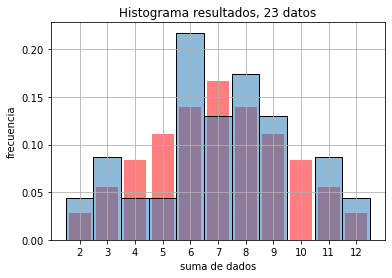

In [187]:
# Simulamos:
n_tiradas = 20
_, _, resultado = tirar_dados(n_tiradas)

# Resultado analitico:
plt.bar(frecuencias.keys(), [i/36 for i in frecuencias.values()], color='r', alpha=0.5)
plt.xlabel('suma de dados')
plt.ylabel('frecuencia')
plt.title(f'densidad de suma de dados.')

# Resultado de simulación:
sns.histplot(resultado, bins=10, discrete=1, alpha=0.5, stat='density')
plt.title(f'Histograma resultados, {n_tiradas} datos')
plt.xticks(range(2, 13))
plt.grid()
plt.show()

In [182]:
#Resolución mediante simulación de suma directa
def suma_directa(n_tiradas):
    suma = np.random.choice(range(2, 13), size=n_tiradas, p=[i/36 for i in frecuencias.values()])
    
    return suma

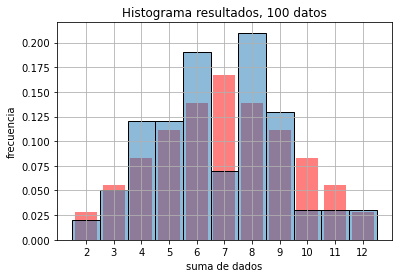

In [191]:
# Simulamos:
n_tiradas = 100
resultado = suma_directa(n_tiradas)

# Resultado analitico:
plt.bar(frecuencias.keys(), [i/36 for i in frecuencias.values()], color='r', alpha=0.5)
plt.xlabel('suma de dados')
plt.ylabel('frecuencia')
plt.title(f'densidad de suma de dados.')

# Resultado de simulación:
sns.histplot(resultado, bins=10, discrete=1, alpha=0.5, stat='density')
plt.title(f'Histograma resultados, {n_tiradas} datos')
plt.xticks(range(2, 13))
plt.grid()
plt.show()

## Simulación del juego de rol
- Si la suma es 11 o 12, golpeamos un crítico de 150 veces el valor de la suma de los dados.
- Si la suma es un número par, excepto punto 1, nuestro golpe es bloqueado.
- Si la suma es un número impar, excepto punto 1, nuestro golpe es normal, por 100 veces el valor de la suma de los dados.

In [198]:
def decision_resultado(suma):
    hit = 0
    mensaje = ''
    
    if suma in [11, 12]:
        hit = 150 * suma
        mensaje = 'crítico'
        
    elif suma % 2 == 0:
        hit = 0
        mensaje = 'bloqueado'
    
    else:
        hit = suma * 100
        mensaje = 'golpe'
        
    return hit, mensaje

def simulador(horizonte):
    
    resultados = suma_directa(horizonte)
    
    mensajes = []
    hits = []
    
    for i in resultados:
        
        hit, mensaje = decision_resultado(i)
        
        mensajes.append(mensaje)
        hits.append(hit)
        
    return hits, mensajes, resultados

In [199]:
horizonte = 20

hits, mensajes, resultados = simulador(horizonte)

pd.DataFrame({'Suma': resultados, 'Hits': hits, 'Mensajes': mensajes})

,Suma,Hits,Mensajes
0,4,0,bloqueado
1,7,700,golpe
2,7,700,golpe
3,6,0,bloqueado
4,4,0,bloqueado
5,7,700,golpe
6,3,300,golpe
7,9,900,golpe
8,6,0,bloqueado
9,6,0,bloqueado


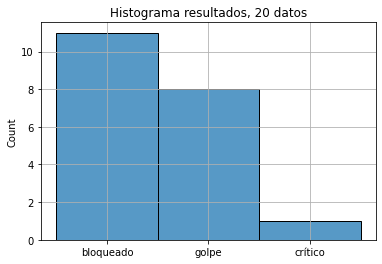

In [201]:
# Resultado de simulación:
sns.histplot(mensajes, bins=3, discrete=1)
plt.title(f'Histograma resultados, {horizonte} datos')
plt.grid()
plt.show()

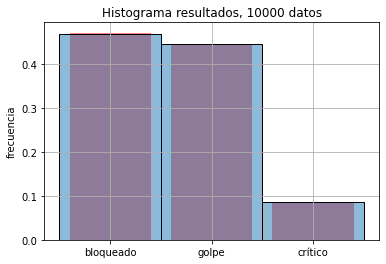

In [215]:
# Analítica vs simulación:

frecuencias_mensajes = {
    'bloqueado': 17,
    'golpe': 16,
    'crítico': 3
}

# Simulamos:
horizonte = 10000
_, resultado, _ = simulador(horizonte)

# Resultado analitico:
plt.bar(frecuencias_mensajes.keys(), [i/36 for i in frecuencias_mensajes.values()], color='r', alpha=0.5)
plt.ylabel('frecuencia')

# Resultado de simulación:
sns.histplot(resultado, bins=10, discrete=1, alpha=0.5, stat='density')
plt.title(f'Histograma resultados, {horizonte} datos')
plt.grid()
plt.show()

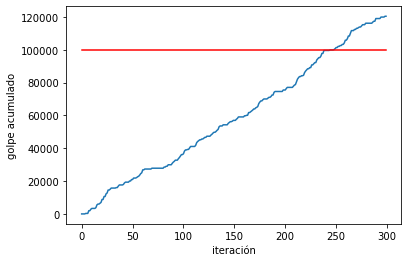

In [237]:
# Simulación de hits acumulados
horizonte = 300
vida = 100_000

hits, mensajes, resultados = simulador(horizonte)
df = pd.DataFrame({'Suma': resultados, 'Hits': hits, 'Mensajes': mensajes})

df['Golpe acumulado'] = df['Hits'].cumsum()

plt.plot(df['Golpe acumulado'])
plt.xlabel('iteración')
plt.ylabel('golpe acumulado')

id_it = (df['Golpe acumulado'] > vida).idxmax()

plt.plot(range(0, horizonte), [vida] * horizonte, color='r')

In [238]:
print(f'Iteraciones hasta matar a Dark Wizard: {id_it}')

Iteraciones hasta matar a Dark Wizard: 248


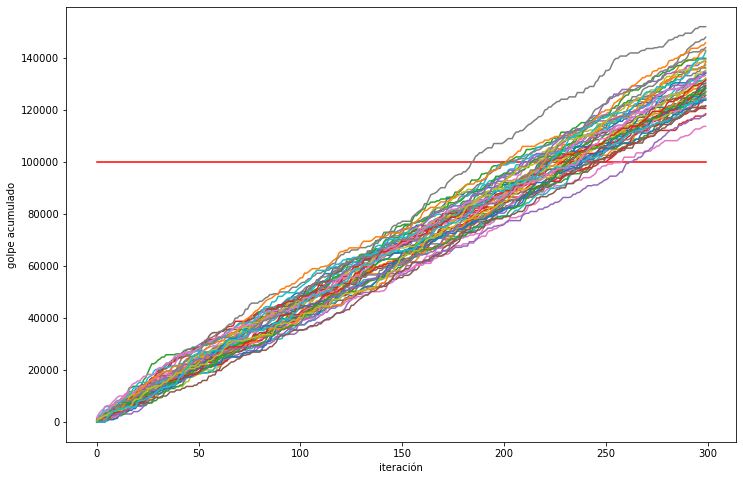

In [246]:
# Método de monte carlo para calcular golpes acumulados.
monte_carlo_paths = 50
horizonte = 300
vida = 100_000

plt.subplots(figsize=(12,8))
plt.plot(range(0, horizonte), [vida] * horizonte, color='r')
iteraciones = []

for i in range(0, monte_carlo_paths):
    hits, mensajes, resultados = simulador(horizonte)
    df = pd.DataFrame({'Suma': resultados, 'Hits': hits, 'Mensajes': mensajes})

    df['Golpe acumulado'] = df['Hits'].cumsum()

    plt.plot(df['Golpe acumulado'])
    plt.xlabel('iteración')
    plt.ylabel('golpe acumulado')

    id_it = (df['Golpe acumulado'] > vida).idxmax()
    iteraciones.append(id_it)

plt.show()

In [251]:
# Método de monte carlo para calcular golpes acumulados.
monte_carlo_paths = 10000
horizonte = 300
vida = 100_000

iteraciones = []

for i in range(0, monte_carlo_paths):
    hits, mensajes, resultados = simulador(horizonte)
    df = pd.DataFrame({'Suma': resultados, 'Hits': hits, 'Mensajes': mensajes})
    df['Golpe acumulado'] = df['Hits'].cumsum()
    id_it = (df['Golpe acumulado'] > vida).idxmax()
    iteraciones.append(id_it)

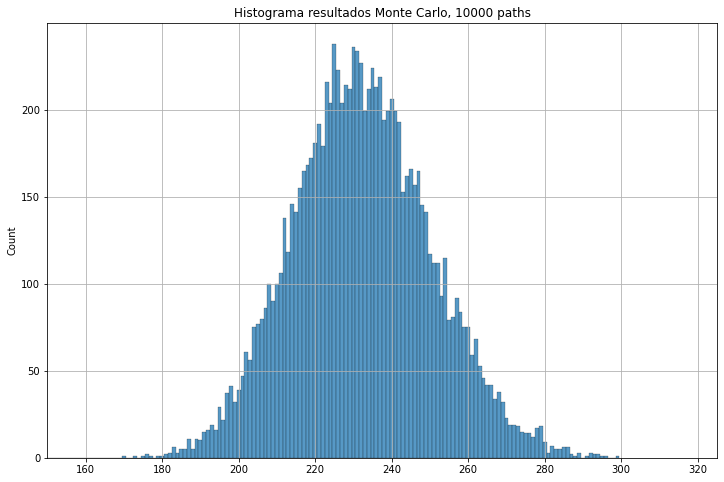

In [257]:
# Histograma de resultados
plt.subplots(figsize=(12,8))
sns.histplot(iteraciones, bins=3, discrete=1)
plt.title(f'Histograma resultados Monte Carlo, {monte_carlo_paths} paths')
plt.xlim([150, 325])
plt.grid()
plt.show()

In [260]:
print(f'Media de golpes para matar a Dark Wizard: {np.mean(iteraciones)}')

Media de golpes para matar a Dark Wizard: 232.2758
